First we impot the libraries we will need. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split




Make a train and a test set.

We start with loading the data into a pandas dataframe.

In [2]:
df = pd.read_csv('King_County_House_prices_dataset.csv')

We take a look at the data.

In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We split into train and test set.

In [6]:
df, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [7]:
df_test.shape

(4320, 21)

We check for missing data.

In [8]:
(df.isnull().sum() / len(df))*100 # percentage of missing data

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       10.956763
view              0.289402
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.786653
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

We can reconstitute some data:
sqft_basement has about 2% missing data. I am checking if living space and living space above are the same as this would indicate that the place has no basement. If, in such cases, there is a missing value, i replace that value with 0.

In [9]:
df.loc[(df.sqft_living == df.sqft_above) & (df.sqft_basement.isnull() == True), 'sqft_basement'] = 0 

Check missing data again.

In [10]:
(df.isnull().sum() / len(df))*100 # percentage of missing data

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       10.956763
view              0.289402
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.786653
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

Create new variable living_per_floor to apporximate the area footprint of the house. This is not exact but better than nothing. 

In [11]:
df['living_per_floor'] = df.sqft_above / df.floors

Create new variable price_per_living that is the price per sqft_living. A better (different) variable to work with than the total price.

In [12]:
df['price_per_living'] = df.price / df.sqft_living

Creating natural logarithm of price as separate variable.

In [13]:
df['log_price'] = np.log(df['price'])

We need to do this for the test set also.

In [14]:
df_test['log_price'] = np.log(df_test['price'])

Checking out waterfront properties. They are almost twice as expensive!

In [15]:
df.groupby('waterfront').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,living_per_floor,price_per_living,log_price
waterfront,,,,,,,,,,,,,,,,,,,,,
0.0,4.581185e+09,5.344978e+05,3.378407,2.114829,2078.652123,15096.863601,1.494530,0.203378,3.411884,7.654874,...,1970.967178,79.523100,98077.601677,47.560091,-122.214019,1983.396882,12814.272668,1236.167853,262.428333,13.043329
1.0,4.528874e+09,1.677849e+06,3.341667,2.668750,3217.041667,27535.308333,1.595833,3.798319,3.550000,8.775000,...,1962.791667,511.712871,98094.491667,47.535283,-122.275942,2669.141667,23575.216667,1575.730556,506.243159,14.103325


#There are not many waterfront properties and they seem to follow different pricing rules so i will eliminate them. 

In [16]:
#df = df.query('waterfront == 0')

Making new variable 'garden', which is sqft_lot minus living_per_floor.

In [17]:
df['garden'] = df.sqft_lot - df.living_per_floor

Looking at mean price_per_living at the 70 different zipcodes:

In [18]:
price_zip = pd.pivot_table(df, values='price_per_living', index='zipcode')

In [19]:
price_zip.head()

,price_per_living
zipcode,
98001,150.834500
98002,150.176923
98003,157.827708
98004,476.978966
98005,313.724154


Creating 20 bins for mean_price_per living. Dropping mean price_per_living and making price_zip_bin categories numeric

In [20]:
price_zip_bins = np.arange(0,1.05,0.05)
price_zip_series = pd.qcut(price_zip['price_per_living'], q=price_zip_bins, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
price_zip_series.name = 'price_zip_bins'
price_zip = pd.concat([price_zip, price_zip_series], axis=1)
price_zip.drop(['price_per_living'], axis='columns',inplace=True)
price_zip['price_zip_bins'] = pd.to_numeric(price_zip.price_zip_bins)
price_zip.head()

,price_zip_bins
zipcode,
98001,1
98002,1
98003,2
98004,20
98005,16


We will need price_zip bins later for assigning test data zipcodes to price_zip_bins

We merge price_zip to df using the common zipcode column to assign a price_zip_bin to every zipcode. We will do this later for the test data as well.

In [21]:
df = df.merge(price_zip, on='zipcode')

We use the same price_zip categories on the test set. In this case they depend only on the zipcode.

In [22]:
df_test = df_test.merge(price_zip, on='zipcode')

We drop all columns we are not going to need from now on. (We don't need to do this but it looks cleaner)

In [23]:
df.drop(['condition','grade','bedrooms','bathrooms','view','sqft_above', 'waterfront', 'yr_renovated','sqft_living15', 'sqft_lot15'], axis='columns',inplace=True)


In [24]:
df.head()

,id,date,price,sqft_living,sqft_lot,floors,sqft_basement,yr_built,zipcode,lat,long,living_per_floor,price_per_living,log_price,garden,price_zip_bins
0,1269200229,7/23/2014,1380000.0,3786,38038,1.0,1852.0,1978,98070,47.3907,-122.448,1934.0,364.500792,14.137594,36104.0,13
1,2817100900,5/19/2014,256500.0,1120,9912,1.0,0.0,1980,98070,47.3735,-122.430,1120.0,229.017857,12.454884,8792.0,13
2,5341600030,5/9/2014,255000.0,960,28717,1.0,0.0,1984,98070,47.3356,-122.502,960.0,265.625000,12.449019,27757.0,13
3,3874400380,3/16/2015,445000.0,1740,22089,1.0,610.0,1977,98070,47.3948,-122.435,1130.0,255.747126,13.005830,20959.0,13
4,3223039010,8/4/2014,260000.0,570,81893,1.0,0.0,1936,98070,47.4433,-122.444,570.0,456.140351,12.468437,81323.0,13


In [25]:
(df.isnull().sum() / len(df))*100 # percentage of missing data

id                  0.0
date                0.0
price               0.0
sqft_living         0.0
sqft_lot            0.0
floors              0.0
sqft_basement       0.0
yr_built            0.0
zipcode             0.0
lat                 0.0
long                0.0
living_per_floor    0.0
price_per_living    0.0
log_price           0.0
garden              0.0
price_zip_bins      0.0
dtype: float64

Making 20 equal bins for price_per_living. 

In [26]:
price_bins = np.arange(0,1.05,0.05)
price_series = pd.qcut(df['price_per_living'], q=price_bins, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
price_series.name = 'price_bins'
df = pd.concat([df, price_series], axis=1)
df.shape

(17277, 17)

Making 20 equal bins for sqft_living.

In [27]:
size_bins = np.arange(0,1.05,0.05)
size_series = pd.qcut(df['sqft_living'], q=size_bins, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
size_series.name = 'size_bins'
df = pd.concat([df, size_series], axis=1)
df.shape

(17277, 18)

Making 20 equal bins for gardens.

In [28]:
lot_bins = np.arange(0,1.05,0.05)
lot_series = pd.qcut(df['garden'], q=lot_bins, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
lot_series.name = 'lot_bins'
df = pd.concat([df, lot_series], axis=1)
df.shape

(17277, 19)

Making a new variable called cheap_big that is size_bin minus price_bin. This variable is big when the house is big and the price is low. We need to make the data numeric to do the calculation.

In [29]:
df['price_bins'] = pd.to_numeric(df['price_bins'])
df['size_bins'] = pd.to_numeric(df['size_bins'])
df['cheap_big'] = df.size_bins - df.price_bins

In [30]:
df.head()

,id,date,price,sqft_living,sqft_lot,floors,sqft_basement,yr_built,zipcode,lat,long,living_per_floor,price_per_living,log_price,garden,price_zip_bins,price_bins,size_bins,lot_bins,cheap_big
0,1269200229,7/23/2014,1380000.0,3786,38038,1.0,1852.0,1978,98070,47.3907,-122.448,1934.0,364.500792,14.137594,36104.0,13,17,20,19,3
1,2817100900,5/19/2014,256500.0,1120,9912,1.0,0.0,1980,98070,47.3735,-122.430,1120.0,229.017857,12.454884,8792.0,13,9,3,15,-6
2,5341600030,5/9/2014,255000.0,960,28717,1.0,0.0,1984,98070,47.3356,-122.502,960.0,265.625000,12.449019,27757.0,13,12,2,19,-10
3,3874400380,3/16/2015,445000.0,1740,22089,1.0,610.0,1977,98070,47.3948,-122.435,1130.0,255.747126,13.005830,20959.0,13,11,9,19,-2
4,3223039010,8/4/2014,260000.0,570,81893,1.0,0.0,1936,98070,47.4433,-122.444,570.0,456.140351,12.468437,81323.0,13,19,1,20,-18


Making figures: I found a map of king county on which i project the coordinate date (lat/long). By changing the 'c=' parameter the data points can be coloured according to a variable of choice

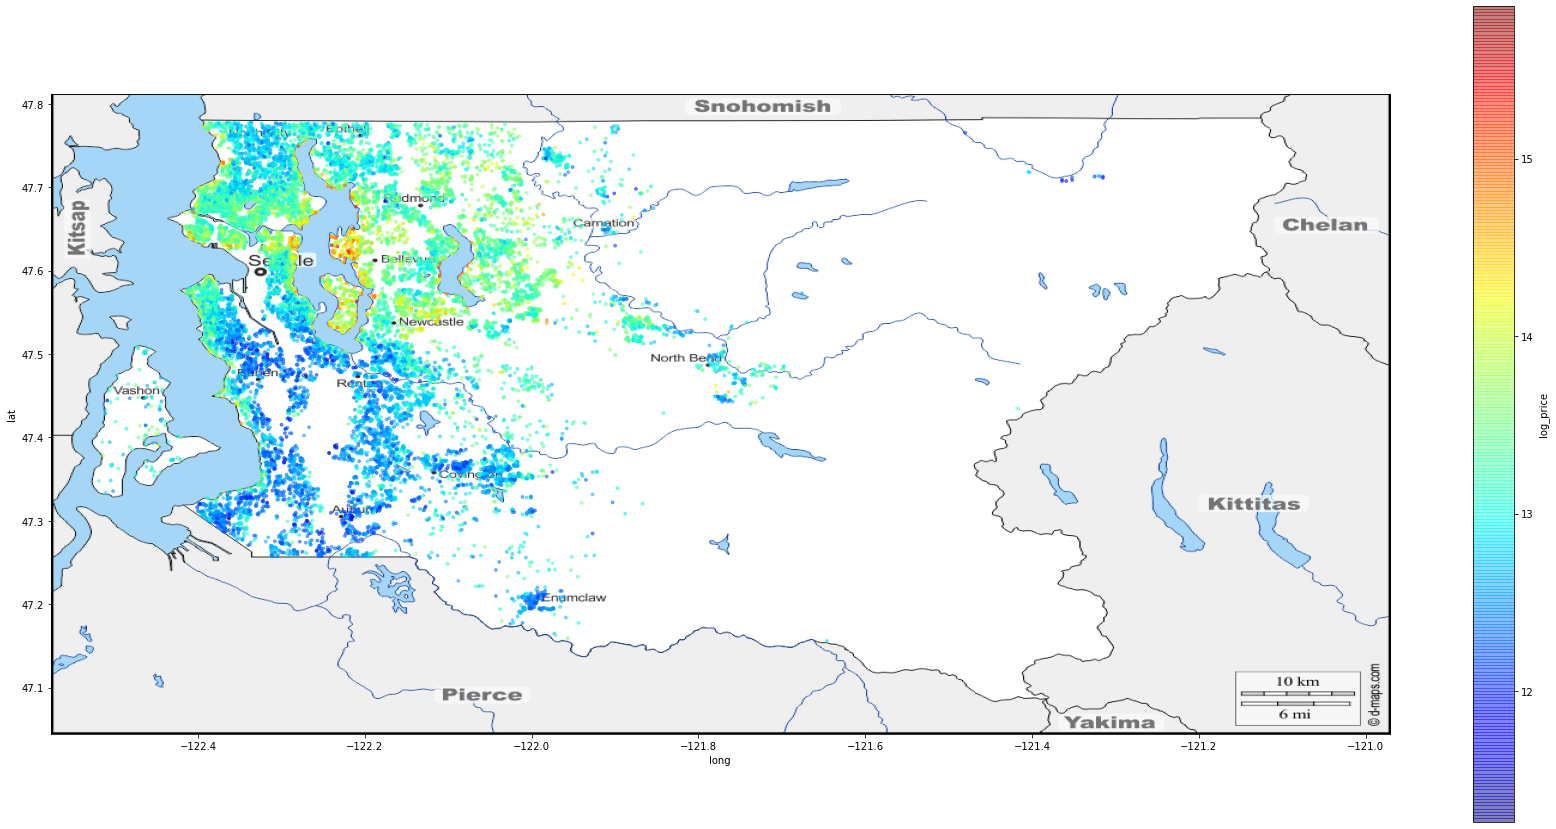

In [31]:
plt.figure(figsize=(30,15))
img=plt.imread('king25.gif')

plt.imshow(img,extent=[-122.577,-120.971,47.044,47.812])
ax = plt.gca()
df.plot(kind='scatter', x='long', y='lat', c='log_price',s=8, ax=ax, cmap=plt.get_cmap("jet"), alpha=0.5)
#plt.legend()
plt.show()

Making some plots and fitting some lines with seaborn (chose different columns to look at different relationships).

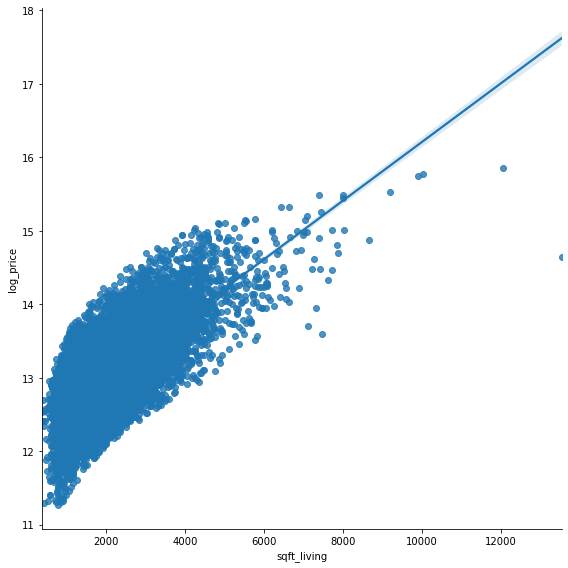

In [32]:
sns.lmplot('sqft_living', 'log_price',data=df, height=8)

Do linear regression to check which parameters are good for predicting price. I found that the natural logarithm of price can be predicted more accurately than the price itself. I also found that i can predict log_price quite well with sqft_licing and my price_zip_bins.

In [33]:
smf.ols(formula='log_price ~ sqft_living + price_zip_bins', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 3.593e+04
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:56:19   Log-Likelihood:                 677.91
No. Observations:               17277   AIC:                            -1350.
Df Residuals:                   17274   BIC:                            -1327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7170      0.005   2218.221      0.000      11.707      11.727
sqft_living        0.0004   1.92e-06    192.836      0.000       0.000       0.000
price_zip_bins     0.0532      0.000    169.067      0.000       0.053       0.054
==============================================================================
Omnibus:                     1573.411   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9102.405
Skew:                          -0.235   Prob(JB):                         0.00
Kurtosis:                       6.525   Cond. No.                     6.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You can check out the correlation matrix to get an idea about what correlates well with each other.

In [34]:
df.corr()

,id,price,sqft_living,sqft_lot,floors,yr_built,zipcode,lat,long,living_per_floor,price_per_living,log_price,garden,price_zip_bins,price_bins,size_bins,cheap_big
id,1.000000,-0.021801,-0.015357,-0.135499,0.017638,0.024173,-0.009387,-0.006904,0.021462,-0.028435,-0.011841,-0.010576,-0.135505,0.000198,-0.007126,-0.000704,0.004188
price,-0.021801,1.000000,0.705295,0.090797,0.256809,0.057802,-0.054459,0.304778,0.022501,0.445721,0.556815,0.887963,0.086119,0.494210,0.498813,0.560935,0.040896
sqft_living,-0.015357,0.705295,1.000000,0.182557,0.359353,0.319383,-0.199811,0.053368,0.238599,0.657784,-0.083628,0.696799,0.175768,0.085397,-0.097037,0.916899,0.661989
sqft_lot,-0.135499,0.090797,0.182557,1.000000,-0.000945,0.058943,-0.134784,-0.083624,0.238211,0.219601,-0.041628,0.102278,0.999943,-0.108060,-0.035724,0.150471,0.121553
floors,0.017638,0.256809,0.359353,-0.000945,1.000000,0.489659,-0.060783,0.043881,0.127521,-0.243213,0.001848,0.311137,0.001721,0.094909,0.020092,0.364299,0.224765
yr_built,0.024173,0.057802,0.319383,0.058943,0.489659,1.000000,-0.351035,-0.151534,0.412125,0.126070,-0.287785,0.082784,0.057698,-0.273322,-0.267864,0.340397,0.396987
zipcode,-0.009387,-0.054459,-0.199811,-0.134784,-0.060783,-0.351035,1.000000,0.271463,-0.566318,-0.261439,0.171632,-0.038543,-0.132233,0.265815,0.194741,-0.213581,-0.266486
lat,-0.006904,0.304778,0.053368,-0.083624,0.043881,-0.151534,0.271463,1.000000,-0.136754,-0.028175,0.474041,0.448845,-0.083512,0.712564,0.574975,0.037748,-0.350400
long,0.021462,0.022501,0.238599,0.238211,0.127521,0.412125,-0.566318,-0.136754,1.000000,0.266125,-0.234204,0.051881,0.235851,-0.287898,-0.217031,0.257156,0.309477
living_per_floor,-0.028435,0.445721,0.657784,0.219601,-0.243213,0.126070,-0.261439,-0.028175,0.266125,1.000000,-0.105306,0.418474,0.209144,-0.069812,-0.129276,0.601434,0.477033


Now we assign variables to use for linear regression. The price is our dependend variable. I also tried predicting log_price which gives much better values. We need to assign independent and dependent variables for train and test data. We can select as many independent variables as we like.

In [35]:
X_train = df[['sqft_living', 'price_zip_bins']].values
y_train = df['price'].values

In [36]:
X_test = df_test[['sqft_living', 'price_zip_bins']].values
y_test = df_test['price'].values

We chose linear regression to fit the data.

In [37]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

We compare the results our model fitted on the training data has produced for the test data with the actual price values for the test data. This gives us a good idea of how good our model is.

In [38]:
y_pred = regressor.predict(X_test)


In [39]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction.head(25)

,Actual,Predicted
0,650000.0,9.469821e+05
1,215000.0,3.123560e+05
2,240000.0,1.557249e+05
3,343000.0,1.773292e+05
4,208000.0,6.660721e+04
5,287000.0,4.284791e+05
6,261000.0,3.258587e+05
7,440000.0,4.797893e+05
8,226000.0,2.799496e+05
9,359000.0,4.608855e+05


We look at some error measurements.

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 122186.15481315044
Mean Squared Error: 36602740533.4103
Root Mean Squared Error: 191318.42706182355


In [41]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [42]:
mean_absolute_percentage_error(y_test, y_pred)

25.847987427643265